## TP4

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
def read_img(img_path):
    # Leemos la imagen
    #=================
    img = cv.imread(img_path)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Suavizamos la imagen
    #=====================
    gray = cv.medianBlur(gray,5)
    return gray

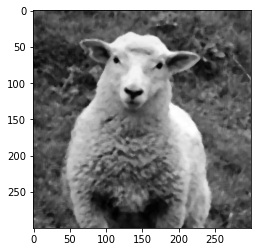

(300, 300)


In [17]:
oveja2 = read_img('oveja2.png')
plt.imshow(oveja2, cmap='gray')
plt.show()
print(oveja2.shape)

In [5]:
def lbp(img):
    M, N = img.shape
    out = img.copy()
    for i in range(1,M-1):
        for j in range(1,N-1):

            threshold = img[i,j]
            lbp = 0
            if img[i,j-1] >= threshold:
                lbp += 1
            if img[i+1,j-1] >= threshold:
                lbp += 2
            if img[i+1,j] >= threshold:
                lbp += 4
            if img[i+1,j+1] >= threshold:
                lbp += 8
            if img[i,j+1] >= threshold:
                lbp += 16
            if img[i-1,j+1] >= threshold:
                lbp += 32
            if img[i-1, j] >= threshold:
                lbp += 64
            if img[i-1, j-1] >= threshold:
                lbp += 128

            out[i, j] = lbp

    return out

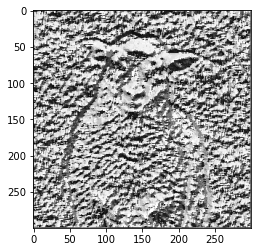

In [19]:
oveja2_lbp = lbp(oveja2)
plt.imshow(oveja2_lbp, cmap='gray')
plt.show()

In [26]:
def comparar_texturas_histogramas(img1_path, img2_path):
    img1 = read_img(img1_path)
    img1_lbp = lbp(img1)

    fig = plt.Figure()
    plt.imshow(img1_lbp, cmap='gray')
    plt.show()

    img2 = read_img(img2_path)
    img2_lbp = lbp(img2)

    fig = plt.Figure()
    plt.imshow(img2_lbp, cmap='gray')
    plt.show()

    hist1,bins1 = np.histogram(img1_lbp.ravel(),256,[0,256])
    plt.plot(hist1)
    plt.show()

    hist2,bins2 = np.histogram(img2_lbp.ravel(),256,[0,256])
    plt.plot(hist2)
    plt.show()

## Comparar las imagenes de ladrillos

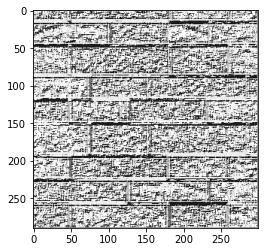

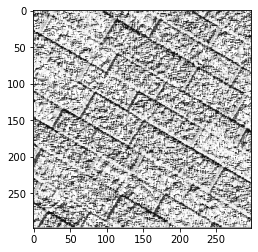

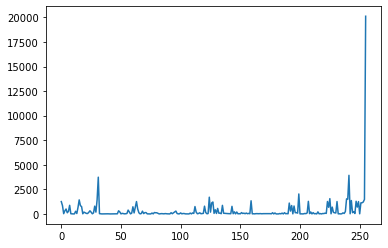

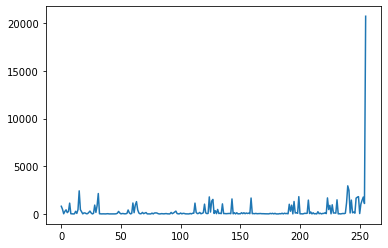

In [27]:
comparar_texturas_histogramas('ladrillos1.png', 'ladrillos2.png')

#### Comparar los histogramas
Se puede ver que los histograman dan casi casi iguales, esto se debe a que las imagenes a pesar de estar rotadas poseen las mismas texturas.

## Comparar las imagenes de ovejas

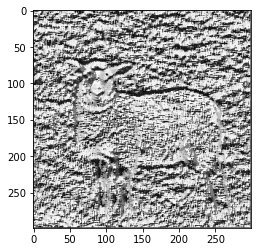

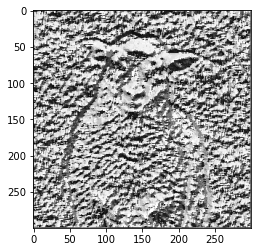

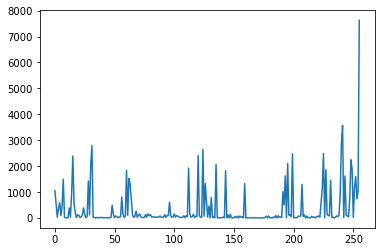

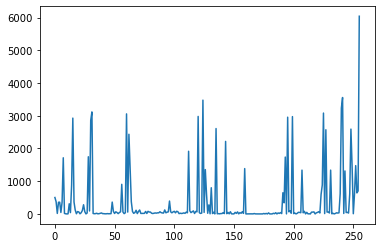

In [28]:
comparar_texturas_histogramas('oveja1.png', 'oveja2.png')

#### Comparar los histogramas
Se puede ver que los histograman dan casi casi iguales, ya que se trata del mismo fondo y y la misma oveja

## Comparar las imagenes de tito

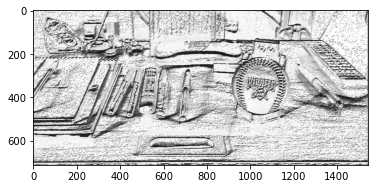

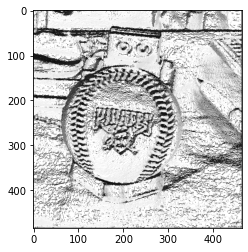

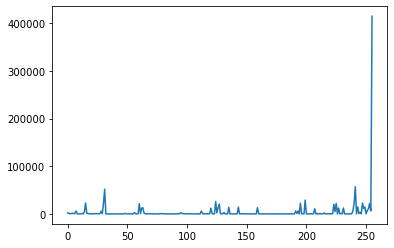

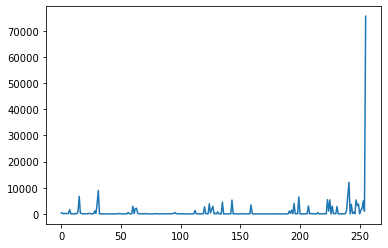

In [31]:
comparar_texturas_histogramas('rbt_scn3.png', 'rbt_scn3_focus.png')

#### Comparar los histogramas
Se puede ver que asombrosamente a pesar de hacer zoom se mantiene la relación de los histogramas, se mantienen las texturas.## Comparar las imagenes de tito

## Comparar las imagenes de tito (otra vez :))

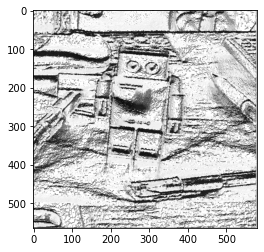

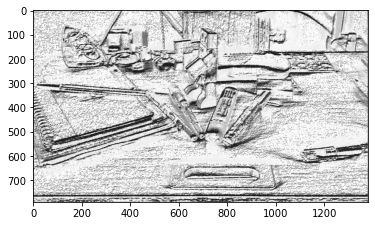

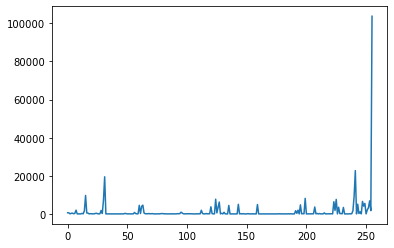

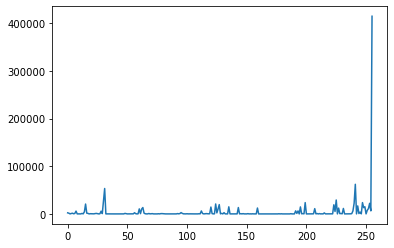

In [33]:
comparar_texturas_histogramas('rbt_scn1_focus.png', 'rbt_scn2.png')